21.03.05 Python N차원 배열(2)

# CH11. N차원 배열 나누기

# 4절. 복사와 뷰

## 4.1 모두 복사 안하기( 스칼라 변수만 제외 )

In [1]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [3]:
b = a # a와 b는 같은 넘파이 계열 객체이지만 이름만 다르다.(복사는 되지 않는다.)

In [4]:
b is a

True

In [7]:
b.shape, b.ndim

((12,), 1)

In [9]:
b.shape = (3,4)
b.shape, b.ndim

((3, 4), 2)

In [10]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
id(a), id(b) # 같은 주소값을 가진다.

(2476536483312, 2476536483312)

In [12]:
def f(data):
    print(id(data))

In [13]:
f(a)

2476536483312


## 4.2 얕은 복사 : 뷰(view)

In [14]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
c = a.view()
c is a

False

In [17]:
c.flags.owndata # c가 메모리를 직접 소유하지는 않는다.

False

In [18]:
a.flags.owndata

True

In [19]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
c.shape, c.ndim

((3, 4), 2)

In [21]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
c.shape=(2,6)

In [24]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
c[:,2] = 999 # 2와 8 대신에 999로 바꿈
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [29]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [30]:
a = np.arange(12).reshape(3,4)
s = a[:,1:3]
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [31]:
s[:,0] = 99 # 1대신 99, 5대신 99
s

array([[99,  2],
       [99,  6],
       [99, 10]])

## 4.3 완전 복사 : copy

In [33]:
a = np.arange(12).reshape(3,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
a is d

False

In [37]:
d.flags.owndata # d 객체가 메모리를 직접 소유하고 있다.

True

In [38]:
d.base is a # d와 a는 어떤것도 공유 하고있지 않다.

False

In [39]:
d.shape = (2,6)
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [40]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
d[0] = [99]
a,d

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[99, 99, 99, 99, 99, 99],
        [ 6,  7,  8,  9, 10, 11]]))

# 5절. 고급 인덱싱

## 5.1 인덱스 배열로 인덱싱

In [44]:
a = np.arange(10)**2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [46]:
i = np.array([1,1,3,8,5])

In [47]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [48]:
l = [1,1,3,8,5]
a[l]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [49]:
j = np.array([[3,4],
            [9,7]])
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

- 인덱스의 단일 배열은 첫번째 차원을 참조

In [56]:
palette = np.array([[0,0,0],        # black
                  [255,0,0],        # red
                  [0,255,0],        # green
                  [0,0,255],        # blue
                   [255,255,255]])  # white
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [57]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [58]:
image_data = palette[image_index]

In [59]:
image_data.shape

(10, 10, 3)

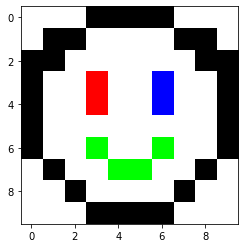

In [62]:
from matplotlib import pyplot as plt
# %matplotlib inline - 주피터 노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게 하는 명령어
plt.imshow(image_data, interpolation='nearest')
plt.show()

In [ ]:
# tensorflow pakage install

In [65]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape

(60000, 28, 28)

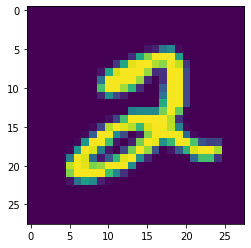

In [68]:
mnist_data = mnist[0][0]
mnist_data[0]
import matplotlib.pyplot as plt
plt.imshow(mnist_data[5])

## 5.2 다차원 인덱싱

In [69]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [70]:
i = np.array([[0,1],
             [1,2]])
j = np.array([[2,1],
             [3,3]])

print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [71]:
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [72]:
a[i, :] # 행만 기입하면 열은 모든 열을 의미

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [73]:
a[i].shape

(2, 2, 4)

In [74]:
a[i,]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [75]:
a[i,...]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [76]:
a[i,] == a[i]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [77]:
np.all(a[i,] == a[i]) # 모든 요소가 True여야 True로 반환

True

In [78]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
i

array([[0, 1],
       [1, 2]])

In [85]:
a(i, np.array[([[2,2,],[2,2]])]

SyntaxError: unexpected EOF while parsing (<ipython-input-85-39a1eab0958f>, line 1)

In [84]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

## 5.3 argmax : 최대값이 있는 곳의 인덱스

In [113]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [114]:
ind = data.argmax(axis=0) # 각 열에서 큰값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [115]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [116]:
for i, item in enumerate(data_col_max):
    print("{}번째 열의 최대값은 {:5f}".format(i, item))

0번째 열의 최대값은 0.989358
1번째 열의 최대값은 0.841471
2번째 열의 최대값은 0.990607
3번째 열의 최대값은 0.656987


In [117]:
data.max(axis=0)

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [118]:
np.all(data.max(axis=0) == data_col_max)

True

In [ ]:
# 행마다 최대값 출력하기(argmax 함수 이용)

In [119]:
ind = data.argmax(axis=1)
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [120]:
data_row_max = data[range(data.shape[0]), ind]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [121]:
for i, item in enumerate(data_row_max):
    print("{}번째 열의 최대값은 {:5f}".format(i, item))

0번째 열의 최대값은 0.909297
1번째 열의 최대값은 0.656987
2번째 열의 최대값은 0.989358
3번째 열의 최대값은 0.990607
4번째 열의 최대값은 0.149877


## 5.3 인덱싱을 이용한 값 변경

In [103]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [106]:
a[[1,3,4]] = 0 # a[1,3,4] = 0
a

array([0, 0, 2, 0, 0])

In [107]:
a = np.arange(5)
a[[0,0,2]] = [99,999,999]
a

array([999,   1, 999,   3,   4])

In [108]:
a = np.arange(5)
print('변경전 : ', a)
a[[0,0,2]] += 1 # 0번 인덱스가 2번 증가하지 않는다.
print('변경후 : ', a)

변경전 :  [0 1 2 3 4]
변경후 :  [1 1 3 3 4]


## 5.4 논리 배열을 이용한 인덱싱

In [122]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [125]:
b = a%2 == 0
b

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [126]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [128]:
a[b] = a[b]**2
a

array([[     0,      1,     16,      3,    256],
       [     5,   1296,      7,   4096,      9],
       [ 10000,     11,  20736,     13,  38416],
       [    15,  65536,     17, 104976,     19]])

## 5.5 ix_() 함수
- N개의 1차원 시퀸스 배열을 입력 받아서 N차원 N개를 반환

In [130]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [138]:
a[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [134]:
ax, bx = np.ix_(a,b)

In [135]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [136]:
ax.shape, ax.ndim

((4, 1), 2)

In [137]:
bx.shape, bx.ndim

((1, 3), 2)

In [139]:
r = np.add(ax, bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [141]:
print(a[1] + b[2])
print(r[1,2])

15
15


# 6절. 선형대수
- 2차원 넘파이 배열의 행렬
    - 행렬곱            : @ 또는 np.dat()
    - 엳행렬            : np.linalg.inv(x)
    - 전치행렬          : x.T, x.transpose()
    - nxn 단위행렬      : np.eye(n)
    - 대각합            : np.trace(x)
    - 연립 방정식 해 풀기 : np.linalg.solve(a, b)

## 6.1 선형 연립 방정식 풀이(회기도출) : 독립변수 1개, 데이터 2개

In [144]:
# a의 역행렬 @ a가 단위 행렬인지 확인
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [146]:
a @ np.linalg.inv(a)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [148]:
np.eye(2) @ a == a

array([[ True,  True],
       [ True,  True]])

In [149]:
np.all(np.eye(2) @ a == a)

True

In [142]:
a = np.array([[1,2],
            [3,4]]) # 독립변수
a

array([[1, 2],
       [3, 4]])

In [143]:
y = np.array([[5],
              [7]])
y

array([[5],
       [7]])

- a @ X = y
- a의 역행렬 @ a @ X = a의 역행렬 @ y
- X = a의 역행렬 @ y

In [150]:
X = np.linalg.inv(a) @ y
X

array([[-3.],
       [ 4.]])

In [151]:
# 독립변수 2,3일 경우 종속변수 값은?
2 * X[0] + 3*X[1]

array([6.])

## 6.2 선형 연립 방정식(회귀도출)과 그래프, 독립변수 1개

- 정방행렬 데이터1

In [152]:
x = [2,3]
y = [6.8, 7.3]

In [155]:
# 2 1
# 3 1
A = np.column_stack((x, np.ones(len(x)))) # 독립변수
A

array([[2., 1.],
       [3., 1.]])

In [156]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

- A @ X = Y
- X * A의 역행렬 Y

In [157]:
X = np.linalg.inv(A) @ Y
X

array([[0.5],
       [5.8]])

In [158]:
# 연립 방정식 해법을 구하는 함수
np.linalg.solve(A, Y)

array([[0.5],
       [5.8]])

In [160]:
f = A[:,0] * X[0] + X[1] # 도출된 회귀식
f

array([6.8, 7.3])

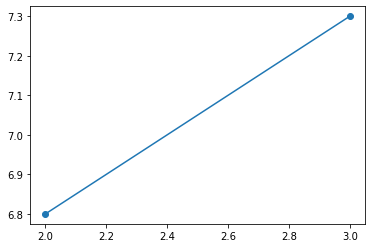

In [164]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
# plt.plot(x, y, '-')
plt.plot(A[:,0], f, '-')
plt.show()

데이터 N개

In [165]:
x = [32, 64, 96, 118, 216, 114, 152, 158] # 독립변수
y = [18, 24, 61.5, 49, 52, 105, 130, 125] # 종속변수

In [167]:
A = np.column_stack((x, np.ones(len(x))))
print(A) # 독립변수 행렬
B = np.array(y).reshape(len(y),1)
print(B) # 종속변수 행렬

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [216.   1.]
 [114.   1.]
 [152.   1.]
 [158.   1.]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130. ]
 [125. ]]


- A @ X = B
- (A.T @ A) = A.T @ B
- (A.T @ A)의 역행렬 @ (A.T @ A) @ X = (A.T @ A)의 역행렬 @ A.T @ B
- X = (A.T @ A)의 역행렬 @ A .T @ B

In [169]:
X = np.linalg.inv(A.T @ A) @ A.T @ B
X

array([[ 0.40900507],
       [21.99314773]])

In [ ]:
# np.linalg.solve(A,B) 불가

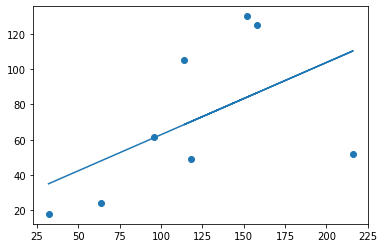

In [172]:
%matplotlib inline
plt.scatter(x,y)
plt.plot(A[:,0], A[:,0]*X[0]+X[1],'-')
plt.show()

# 7절. 유용한 팁

In [188]:
mu, sigma = 2, 0.5
# 정규분포데이터 넘파이 배열 만들기(평균은 mu, 표준편차는 sigma)
v = np.random.normal(mu, sigma, 100000)

In [189]:
(n, bins) = np.histogram(v, bins=50, density=True)
len(n), len(bins)

(50, 51)

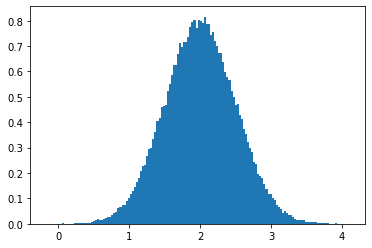

In [190]:
plt.hist(v, bins="auto", density=1)
plt.show()

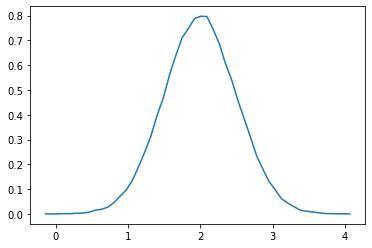

In [191]:
plt.plot(.5*(bins[1:] + bins[:-1]), n)
plt.show()

# 8절. 연습문제

In [193]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data # 독립변수
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [192]:
iris.feature_names # 독립변수의 column내용

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 연습문제

In [256]:
# 문제 1) 각 변수별 평균을 출력 하세요.
print(np.mean(iris_data, axis=0))


[5.84333333 3.05733333 3.758      1.19933333]


In [257]:
# 문제 2) 처음 다섯개 행을 출력하세요.
a = iris_data[:5]
a

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [259]:
# 문제 3) 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
b = iris_data[:5,:-1]
b

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [260]:
# 문제 4) 처음 다섯개 행에서 마지막 열만 출력 하세요
c = iris_data[:5:,-1]
c

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [263]:
# 문제 5) 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번 결과와 같아야 합니다.
d = np.c_[b,c]
d

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [1]:
# 문제 6) 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력 하세요

In [264]:
np.mean(a, axis = 0) # 각 열 별로 평균

array([4.86, 3.28, 1.4 , 0.2 ])